---
---
# Logistic regression for multi-class classification

### * A basic implementation, on MNIST digits dataset, that includes a single linear layer (from 28x28 greyscale image to a length-10 activation vector), followed by a soft-max operation, minimizing the standard cross-entropy loss.

### * Training is done under 4 (2x2) different settings of the hyper-parameters.

### * There are missing pieces of code that you should fill in (notice the  - <font color='red'>EDIT CODE</font> messages).

### * You are required to submit this ipynb file, <font color='blue'>including the executed output blocks</font>.
---
---

## 1] import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## 2] load data

In [3]:
filename_data   = './data/assignment_05_data.npz'
if os.path.exists(filename_data):
  print('data already exists')
else:
  print('downloading data...')
  !mkdir './data'
  !wget -O './data/assignment_05_data.npz' https://www.cs.haifa.ac.il/~skorman/assignment_05_data.npz

downloading data...
mkdir: ./data: File exists


--2023-06-26 19:23:42--  https://www.cs.haifa.ac.il/~skorman/assignment_05_data.npz
Resolving www.cs.haifa.ac.il (www.cs.haifa.ac.il)... 132.74.123.100
Connecting to www.cs.haifa.ac.il (www.cs.haifa.ac.il)|132.74.123.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90049002 (86M)
Saving to: ‘./data/assignment_05_data.npz’

./data/assignment_0 100%[===================>]  85.88M  36.6MB/s    in 2.3s    

2023-06-26 19:23:45 (36.6 MB/s) - ‘./data/assignment_05_data.npz’ saved [90049002/90049002]



In [5]:
directory_data  = './data/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training images :', x_train.shape[0])
print('height of training images :', x_train.shape[1])
print('width of training images :', x_train.shape[2])
print('*************************************************')
print('number of testing images :', x_test.shape[0])
print('height of testing images :', x_test.shape[1])
print('width of testing images :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training images : 20000
height of training images : 28
width of training images : 28
*************************************************
number of testing images : 8000
height of testing images : 28
width of testing images : 28
*************************************************


## 3] number of classes

In [6]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## 4] vectorize image data

In [7]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## 5] index for each class

In [8]:
index_train = {}
index_test  = {}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## 6] plot data

In [9]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 1, nRow * 1))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [10]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

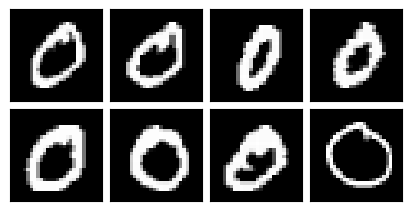

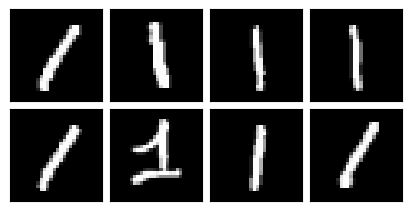

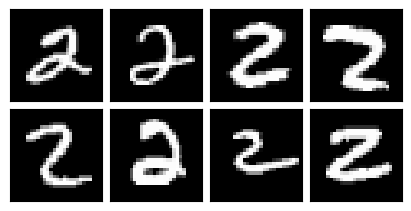

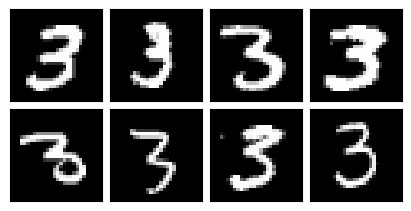

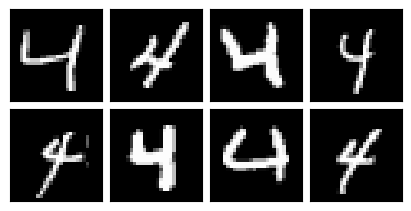

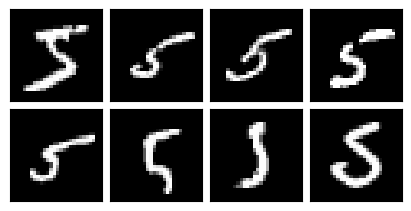

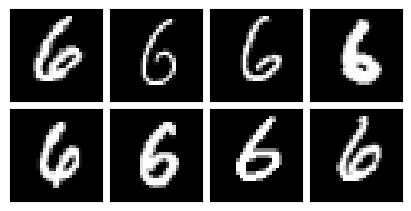

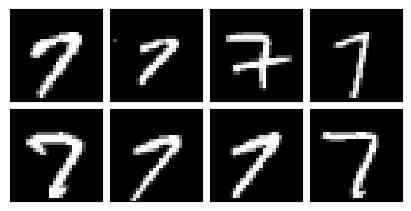

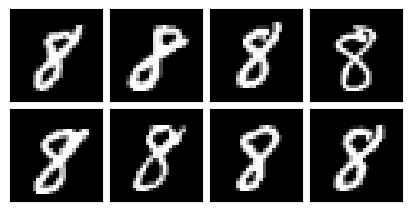

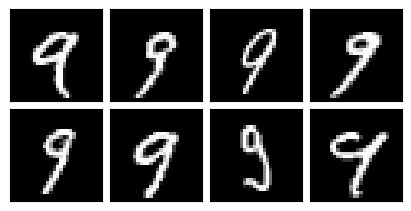

In [11]:
for i in range(nClass):
    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## 7] linear layer

In [12]:
def layer_linear(input, weight):

    output = np.matmul(input, np.transpose(weight))

    return output

## 8] softmax function - <font color='red'>EDIT CODE</font>


In [29]:
def activation_softmax(input):

    output = np.exp(input) / np.sum(np.exp(input), axis=1, keepdims=True)

    return output

## 9] compute prediction by the forward propagation of the neural network - <font color='red'>EDIT CODE</font>

In [14]:
def compute_prediction(input, weight):

    prediction = activation_softmax(layer_linear(input, weight))

    return prediction

## 10] compute cross-entropy loss - <font color='red'>EDIT CODE</font>

In [15]:
def compute_loss_cross_entropy(prediction, label):
    epsilon = 1e-12
    prediction = np.clip(prediction, epsilon, 1. - epsilon)
    loss = -np.sum(label * np.log(prediction))

    return loss

## 11] compute weight decay regularization term of loss - <font color='red'>EDIT CODE</font>

In [55]:
def compute_loss_regularization(weight):

    loss = 0.5 * np.sum(weight * weight)

    return loss

## 12] compute final loss function - <font color='red'>EDIT CODE</font>
### - using the hyper-parameter lmbda to balance the cross-entropy and weight-decay (L=CE+lmbda*WD)

In [17]:
def compute_loss(prediction, label, lmbda, weight):

    loss = compute_loss_cross_entropy(prediction, label) + lmbda * compute_loss_regularization(weight)

    return loss

## 13] compute gradient for the cross-entropy term  - <font color='red'>EDIT CODE</font>
(follow, for example, https://jmlb.github.io/ml/2017/12/26/Calculate_Gradient_Softmax/)

In [31]:
def compute_gradient_cross_entropy(input, prediction, label):
    # input : (num_data, num_feature)
    # prediction : (num_data, num_class)
    # label : (num_data, num_class)
    # gradient : (num_feature, num_class)
    
    gradient = np.matmul(np.transpose(input), prediction - label)
    
    return gradient

## 14] compute gradient for the regularization term - <font color='red'>EDIT CODE</font>

In [19]:
def compute_gradient_regularization(lmbda, weight):

    gradient = lmbda * weight

    return gradient

## 15] compute final combined gradient - <font color='red'>EDIT CODE</font>

In [20]:
def compute_gradient(input, prediction, label, lmbda, weight):

    gradient = compute_gradient_cross_entropy(input, prediction, label) + compute_gradient_regularization(lmbda, weight)

    return gradient

## 16] compute accuracy - <font color='red'>EDIT CODE</font>

In [42]:
def compute_accuracy(prediction, label):

    accuracy = np.mean(np.argmax(prediction, axis=1) == np.argmax(label, axis=1))

    return accuracy

## 17] consider bias in the data

### - bias represented by extending the input with a '1' scalar


In [22]:
one_train   = np.ones((x_train.shape[0], 1))
one_test    = np.ones((x_test.shape[0], 1))

vector_x_train_bias = np.concatenate((vector_x_train, one_train), axis=1)
vector_x_test_bias  = np.concatenate((vector_x_test, one_test), axis=1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## 18] construct model parameters and initialize them - <font color='red'>EDIT CODE</font>

In [23]:
def get_weight(dim_input, dim_output):

    weight = np.zeros((dim_input, dim_output))
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight[:-1,:] = 0.001
    weight[-1, :] = 1

    return weight.T

In [24]:
dim_input   = vector_x_train_bias.shape[1]
dim_output  = 10

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[0, :])

dimension of the model parameters:  (10, 785)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

## 19] hyper-parameters

In [52]:
number_epochs    = 800
learning_rate       = 0.001

list_size_minibatch = [50, 100]
list_weight_decay   = [0.001, 0.01]

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## 20] variables for optimization information (for different minibatch sizes)

In [53]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_epochs))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_epochs))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_epochs))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_epochs))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_epochs))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_epochs))

## 21] variables for optimization information (for different weight decay values)

In [54]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_epochs))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_epochs))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_epochs))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_epochs))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_epochs))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_epochs))

---
# Training
---

### 1] SGD iterations with different mini-batch sizes (with weight decay = 0) - <font color='red'>EDIT CODE</font>

In [56]:
# iteration for mini-batch
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   = len(x_train) // size_minibatch
    lmbda           = 0

    print('mini-batch size = %3d, lmbda = %4.3f' % (size_minibatch, lmbda))

    weight = get_weight(dim_input, dim_output)

    # initialze seed for generating random number
    np.random.seed(0)

    # iteration for epoch
    for i in tqdm(range(number_epochs)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j * size_minibatch : (j+1) * size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, lmbda, weight)
            # update network weights:
            weight      = weight - learning_rate * gradient

            # compute measures after update:
            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, lmbda, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_minibatch[k, i] = np.mean(loss_epoch)
        train_loss_std_minibatch[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_minibatch[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, lmbda, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_minibatch[k, i]       = loss_test
        test_accuracy_minibatch[k, i]   = accuracy_test

mini-batch size =  50, lmbda = 0.000


100%|██████████| 800/800 [06:19<00:00,  2.11it/s]


mini-batch size = 100, lmbda = 0.000


100%|██████████| 800/800 [04:20<00:00,  3.08it/s]


## 2] SGD iterations with different weight decay parameter (with mini-batch size = 100) - <font color='red'>EDIT CODE</font>

In [57]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   = len(x_train) // size_minibatch
    lmbda           = list_weight_decay[k]

    print('mini-batch size = %3d, lmbda = %4.3f' % (size_minibatch, lmbda))

    weight = get_weight(dim_input, dim_output)
    # initialze seed for generating random number
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_epochs)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j * size_minibatch : (j+1) * size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient(data, prediction, label, lmbda, weight)
            # update network weights:
            weight      = weight - learning_rate * gradient

            # compute measures after update:
            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, lmbda, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_weight_decay[k, i] = np.mean(loss_epoch)
        train_loss_std_weight_decay[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_weight_decay[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, lmbda, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_weight_decay[k, i]       = loss_test
        test_accuracy_weight_decay[k, i]   = accuracy_test


mini-batch size = 100, lmbda = 0.001


100%|██████████| 800/800 [05:59<00:00,  2.22it/s] 


mini-batch size = 100, lmbda = 0.010


100%|██████████| 800/800 [04:28<00:00,  2.98it/s]


---
# RESULTS
---

## 1] plot curve (helper functions)

In [33]:
def plot_curve(data, x_label, y_label, title):

    plt.figure(figsize=(4,3))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [34]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(4,3))
    plt.title(title)

    lmbda = 0.3

    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', lmbda = lmbda)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [35]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):

    plt.figure(figsize=(8,5))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [39]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):

    plt.figure(figsize=(8,5))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

### 2] Display loss and accuracy curves (over train and test sets)

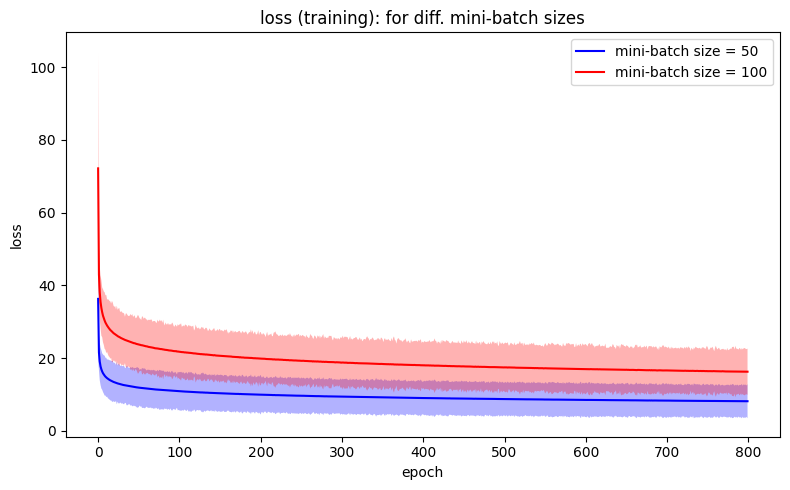

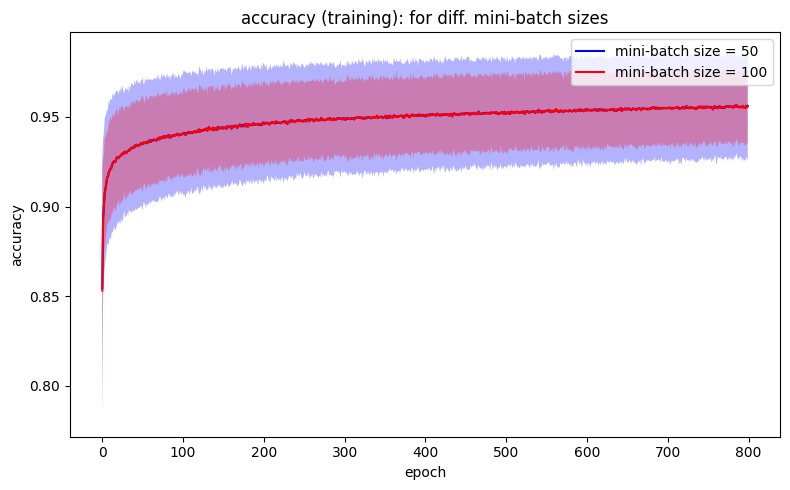

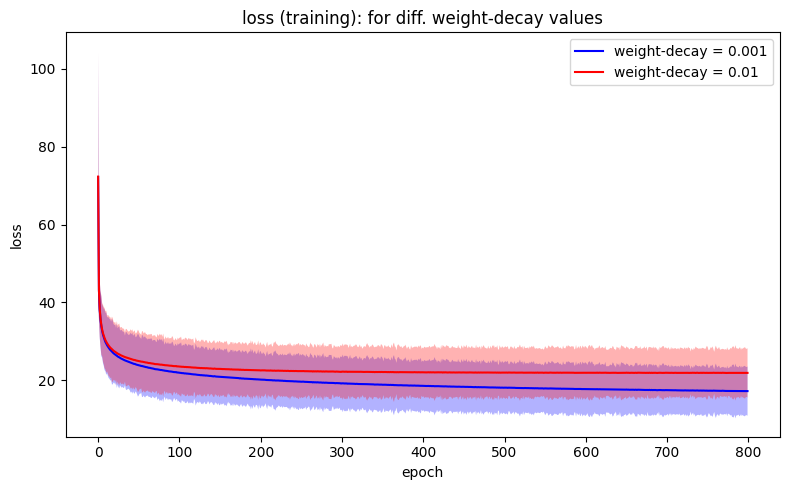

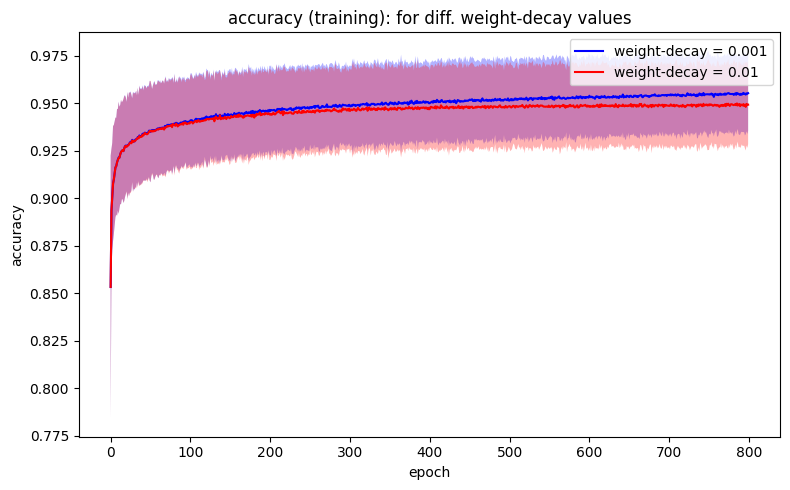

In [58]:
plot_curve_error2(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'mini-batch size = 50',
                  train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'mini-batch size = 100',
                  'epoch', 'loss', 'loss (training): for diff. mini-batch sizes')
plot_curve_error2(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'mini-batch size = 50',
                  train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'mini-batch size = 100',
                  'epoch', 'accuracy', 'accuracy (training): for diff. mini-batch sizes')
plot_curve_error2(train_loss_mean_weight_decay[0], train_loss_std_weight_decay[0], 'weight-decay = 0.001',
                  train_loss_mean_weight_decay[1], train_loss_std_weight_decay[1], 'weight-decay = 0.01',
                  'epoch', 'loss', 'loss (training): for diff. weight-decay values')
plot_curve_error2(train_accuracy_mean_weight_decay[0], train_accuracy_std_weight_decay[0], 'weight-decay = 0.001',
                  train_accuracy_mean_weight_decay[1], train_accuracy_std_weight_decay[1], 'weight-decay = 0.01',
                  'epoch', 'accuracy', 'accuracy (training): for diff. weight-decay values')

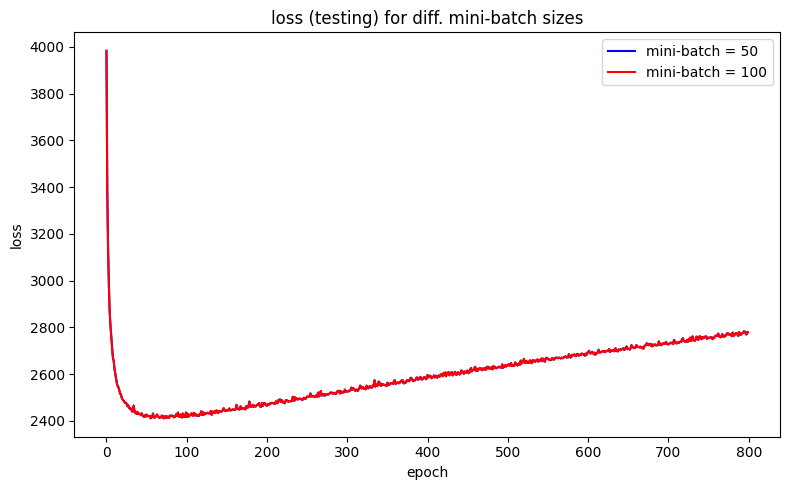

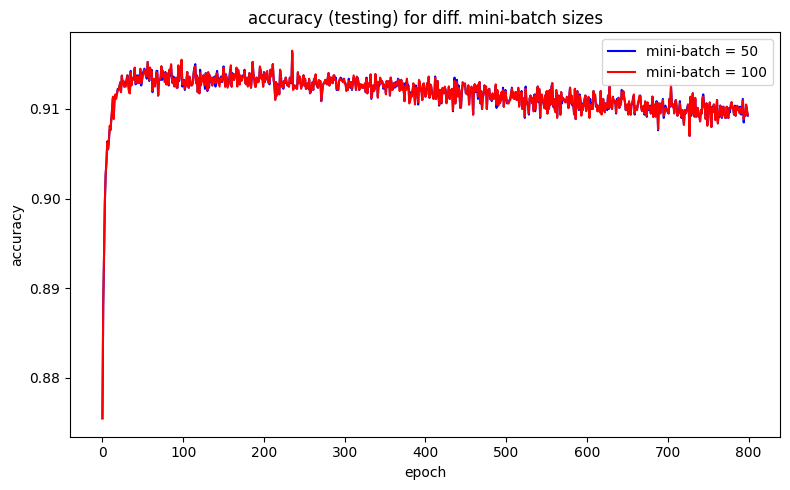

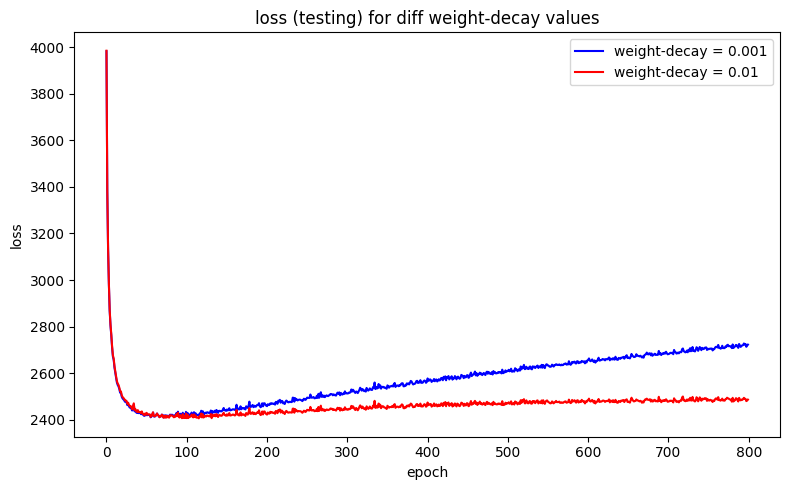

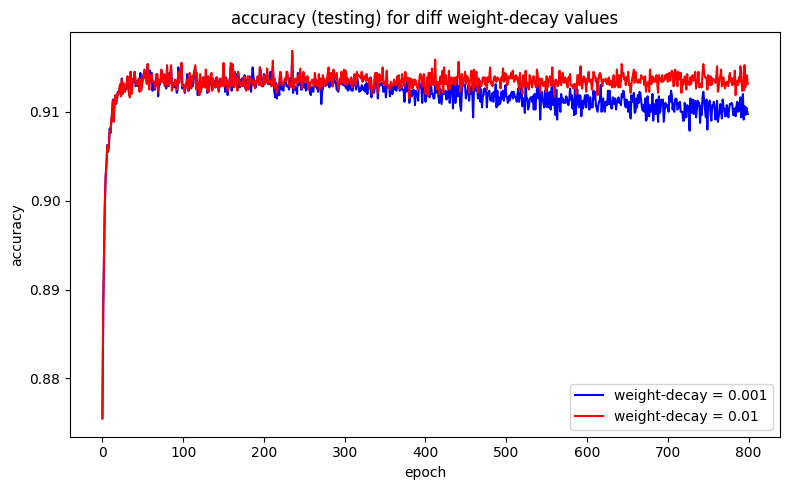

In [59]:
plot_curve2(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', 'epoch', 'loss', 'loss (testing) for diff. mini-batch sizes')
plot_curve2(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', 'epoch', 'accuracy', 'accuracy (testing) for diff. mini-batch sizes')
plot_curve2(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', 'epoch', 'loss', 'loss (testing) for diff weight-decay values')
plot_curve2(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', 'epoch', 'accuracy', 'accuracy (testing) for diff weight-decay values')

## 3] Show mispredictions - <font color='red'>EDIT CODE</font>
### - Visualize 5 random misclassified train images and 5 random misclassified test images.
### - For each, display the image, the predicted distribution, the true and predicted label. Make sure to visualize in a compact and clear manner.

In [75]:
import random
def plot_mispredictions(train_or_test, amount=5):
    data            = x_train if train_or_test == 'train' else x_test
    vector_data     = vector_x_train_bias if train_or_test == 'train' else vector_x_test_bias
    one_hot_labels  = y_train if train_or_test == 'train' else y_test
    labels          = np.argmax(one_hot_labels, axis=1) 

    probabilities   = compute_prediction(vector_data, weight)
    predictions     = np.argmax(probabilities, axis=1)
    mispredictions  = np.where(predictions != labels)[0]

    # Create a figure with a specified size
    fig, axes = plt.subplots(amount, 2, figsize=(8, 4 * amount))

    # Select random mispredictions
    mispredictions = np.random.choice(mispredictions, amount, replace=False)
    for i, index in enumerate(mispredictions):
        # Display the image in the left column
        axes[i, 0].imshow(data[index], cmap='gray')
        axes[i, 0].set_title('true label: %d, predicted: %d' % (labels[index], predictions[index]))
        axes[i, 0].axis('off')

        # Display the probability distribution in the right column
        axes[i, 1].bar(range(10), probabilities[index], color='red')
        axes[i, 1].set_title('Probabilities')
        axes[i, 1].set_xticks(np.arange(10))
        axes[i, 1].set_ylim(0, 1)
        
    plt.suptitle(f'Mispredicted amples from {train_or_test} set', fontsize=16, y=1.02)

    plt.tight_layout()
    plt.show()


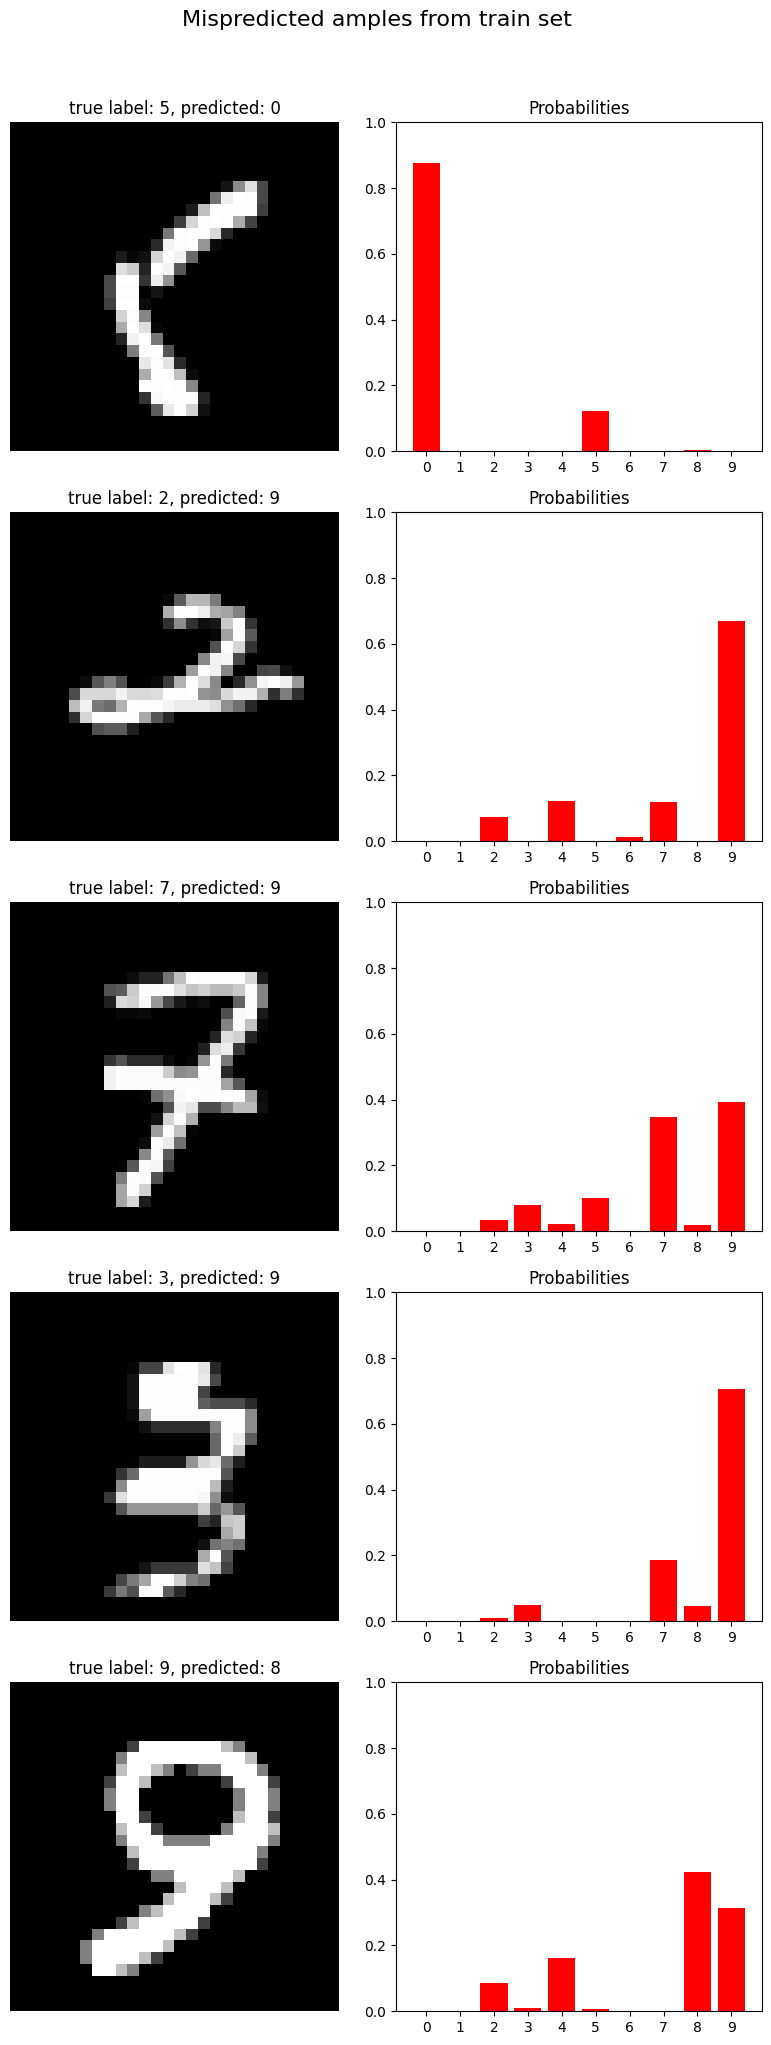

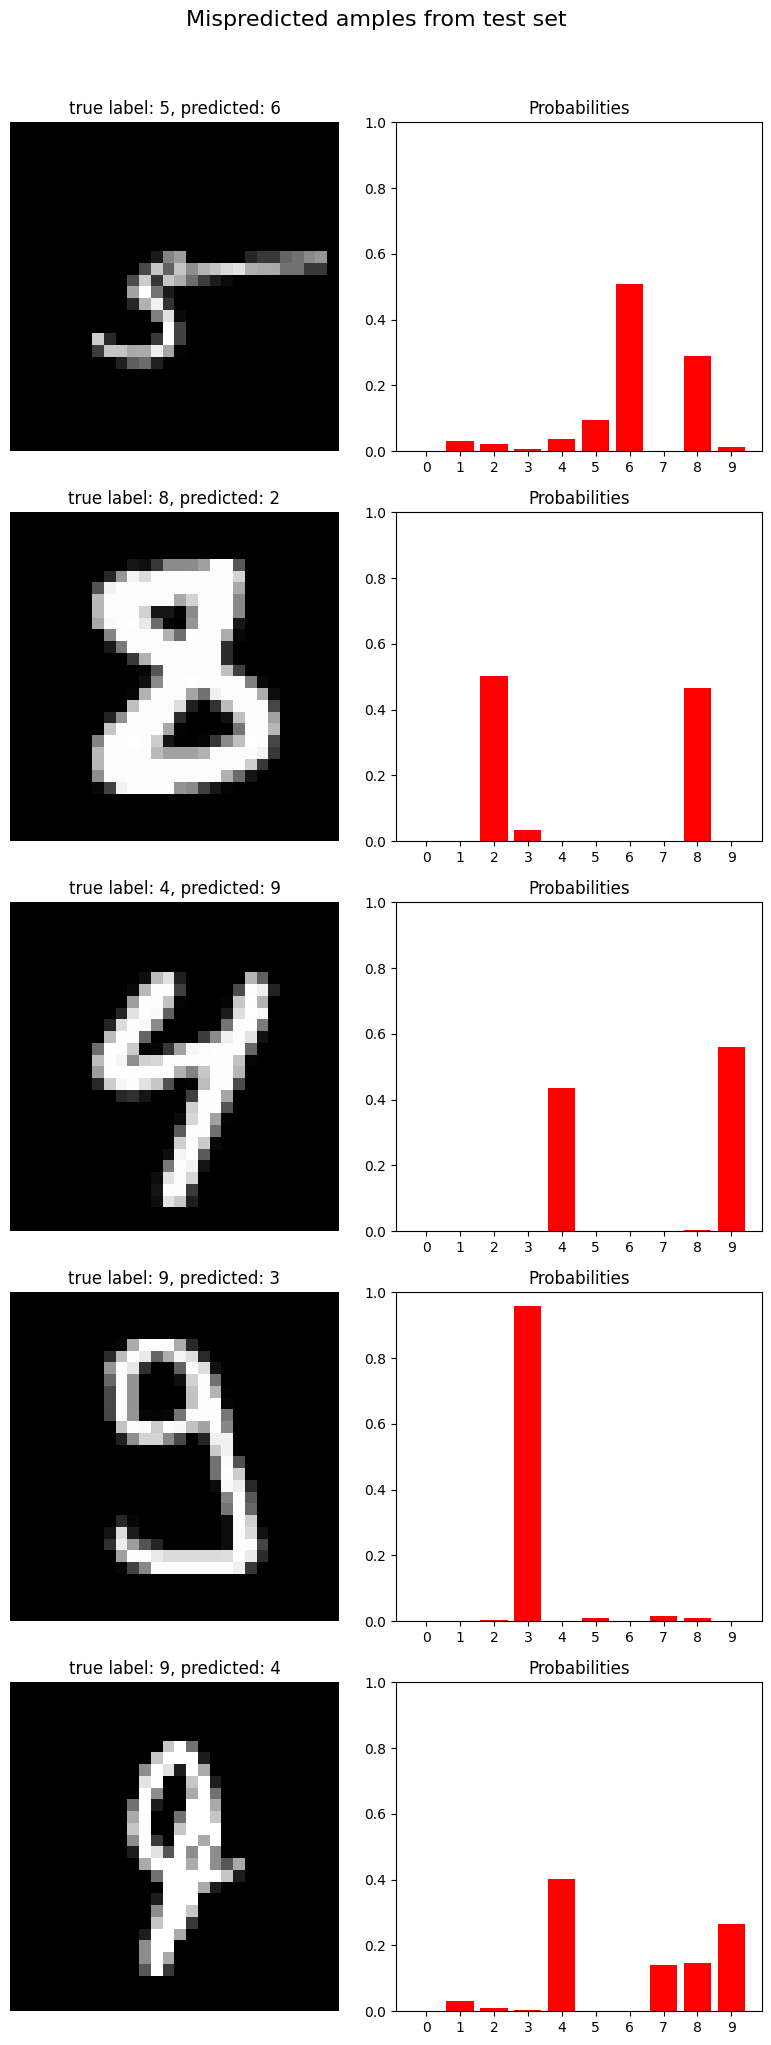

In [76]:
plot_mispredictions('train', 5)
plot_mispredictions('test', 5)

### 4] Present final results  - <font color='red'>EDIT CODE</font>
### - Display a table with the final results - test accuracies for each of the tested configurations.

In [83]:
fuck = np.concatenate((test_accuracy_minibatch, test_accuracy_weight_decay), axis=0)[:, -1]
print(test_accuracy_minibatch.shape)
print(fuck.shape)

(2, 800)
(4,)


In [86]:
### - Display a table with the final results - test accuracies for each of the tested configurations.
import pandas as pd
def final_results_table():
    print('Final results table:')
    test_accuracies = np.concatenate((test_accuracy_minibatch, test_accuracy_weight_decay), axis=0)
    best_test_accuracies = test_accuracies.max(axis=1)
    table = {
    "mini-batch size":  list_size_minibatch + [100, 100],
    "weight-decay":     [0, 0] + list_weight_decay,
    "test accuracy":    test_accuracies[:,-1],
    "best test accuracy": best_test_accuracies
    }
    df = pd.DataFrame(table)
    display(df)
    
final_results_table()

Final results table:


,mini-batch size,weight-decay,test accuracy,best test accuracy
0,50,0.000,0.909250,0.916250
1,100,0.000,0.909375,0.916500
2,100,0.001,0.909750,0.916375
3,100,0.010,0.913125,0.916875


# 5] Improve results - <font color='red'>EDIT CODE</font>
## * Implement two different simple extensions / modifications / configurations that improve the best accuracy achieved above by at least 1%. Do not use a larger number of training epochs.
## * Do not make any special effort to get the best result possible, but simply reach this goal.
### - Insert the required code blocks here below.
### - At the very end (see below), present the final result (test accuracy)

code block 1

code block 2

code block ...

## Final result - <font color='red'>EDIT TEXT and CODE</font>
### - Edit this text here to explain very shortly what you have done.
### - Use the code block below to present your final results (test accuracy only).